# importing necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
from matplotlib import pyplot as plt

# load iris data

In [60]:
df=sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###check distribution of numerical features

/home/sourav/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sourav/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sourav/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

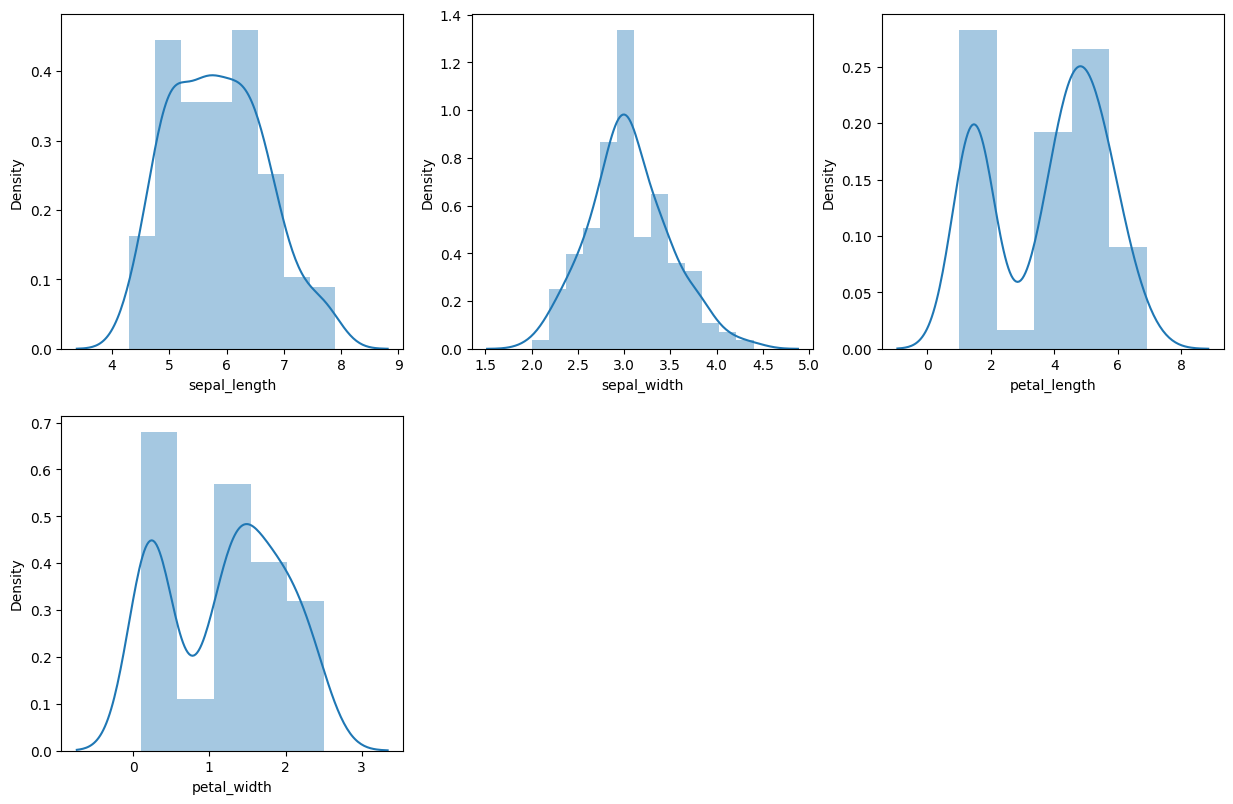

In [64]:
num_col=[i for i in df.columns if df[i].dtypes!=object]
df_num=df[num_col]
plt.figure(figsize=(15, 20))
for i, column in enumerate(num_col, 1):
    plt.subplot(4,3 ,i)
    sb.distplot(df_num[column]) 
plt.show()

/home/sourav/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


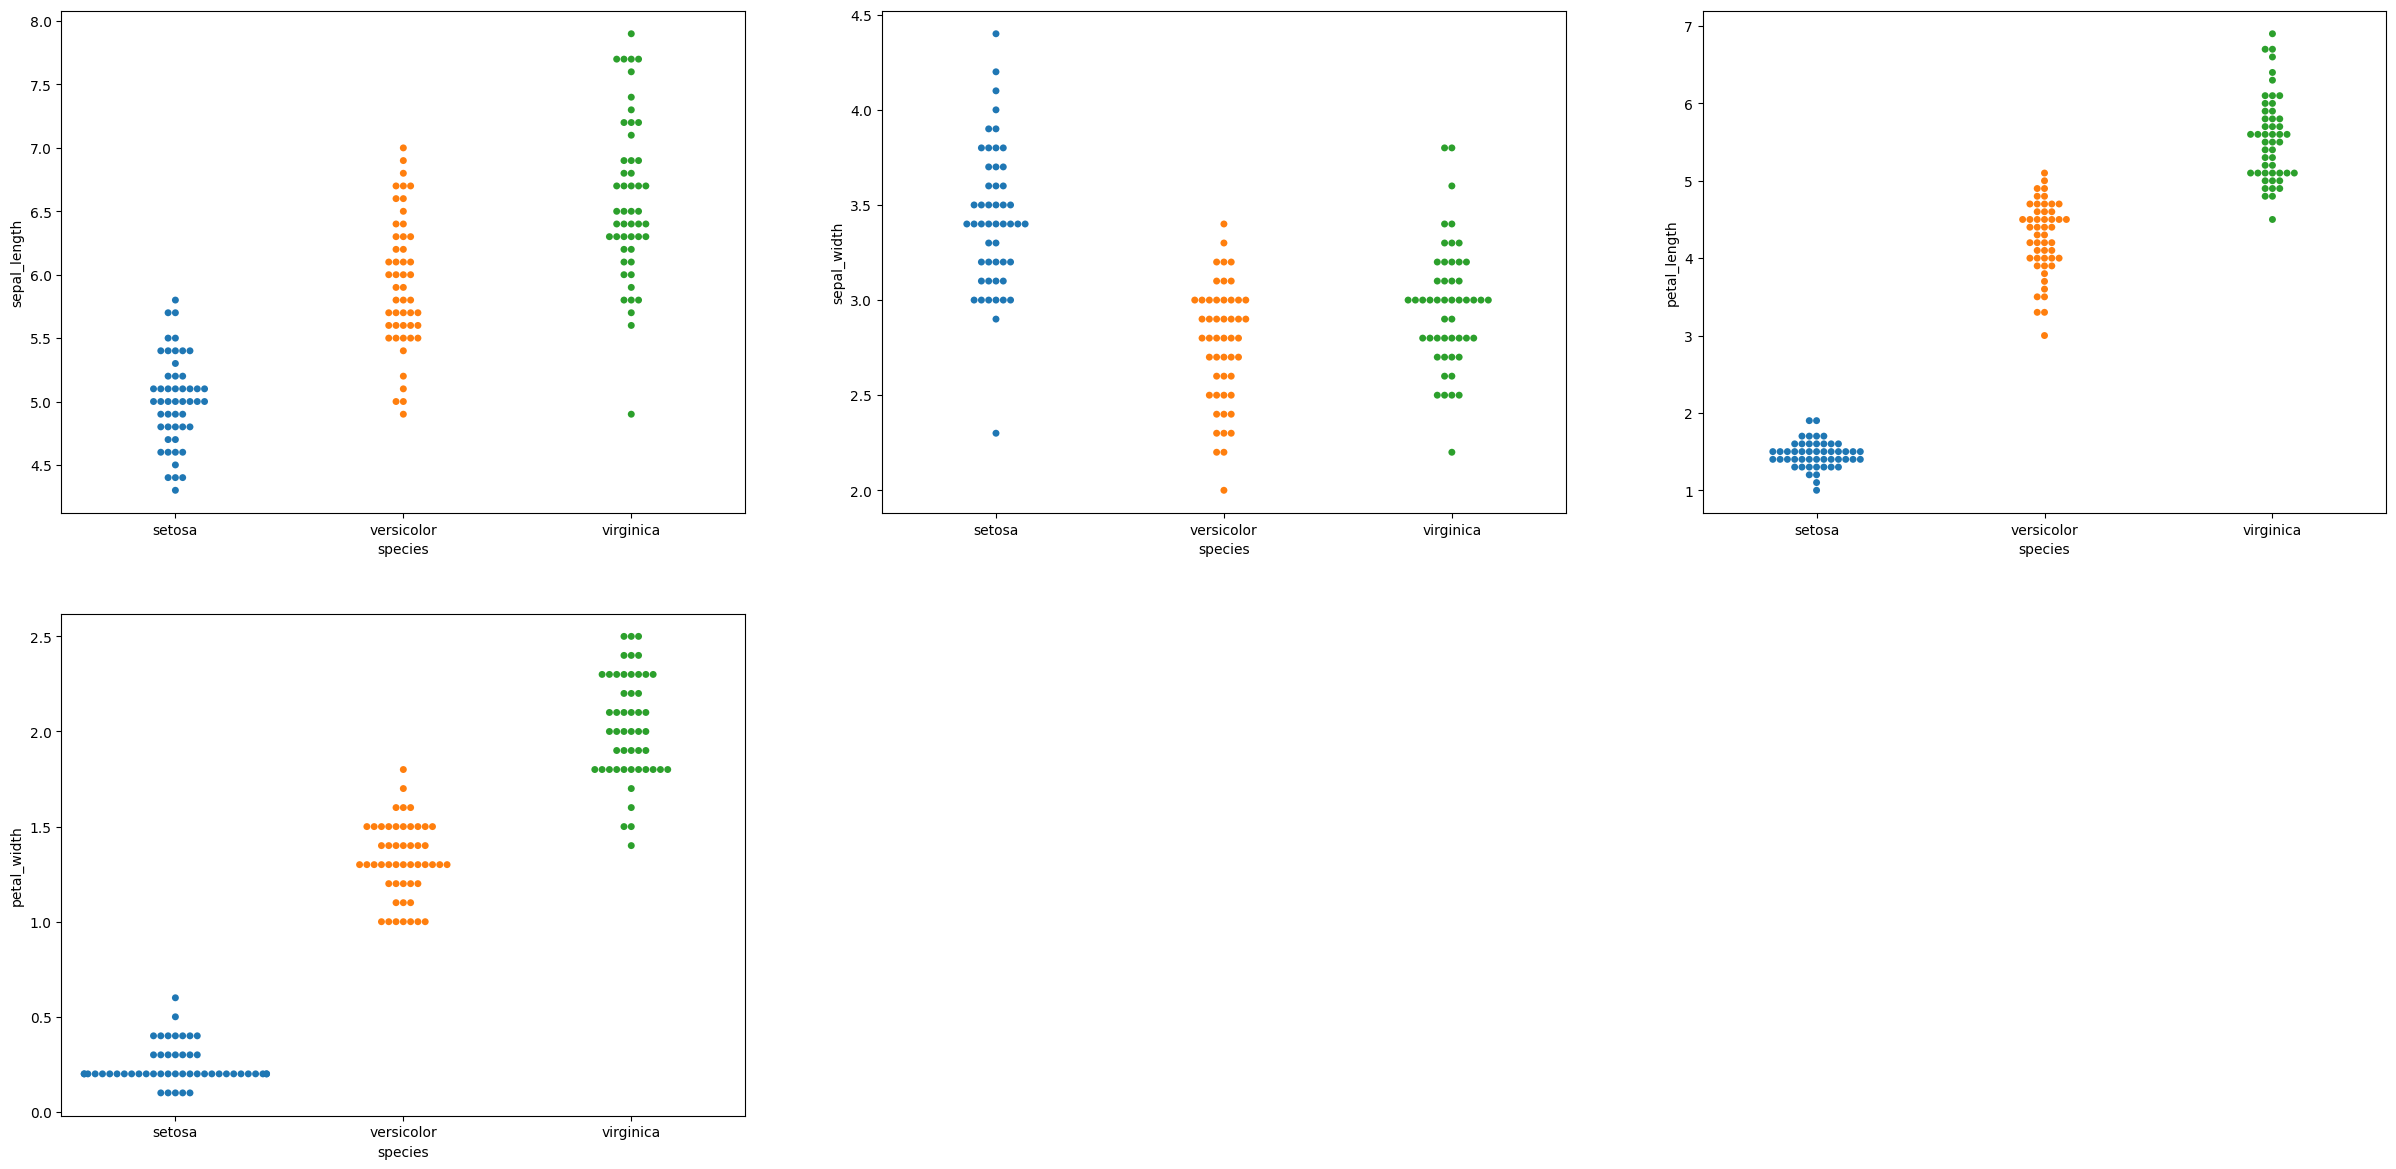

In [65]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(num_col, 1):
    plt.subplot(4,3,i)
    sb.swarmplot(x="species",y=column,data=df)

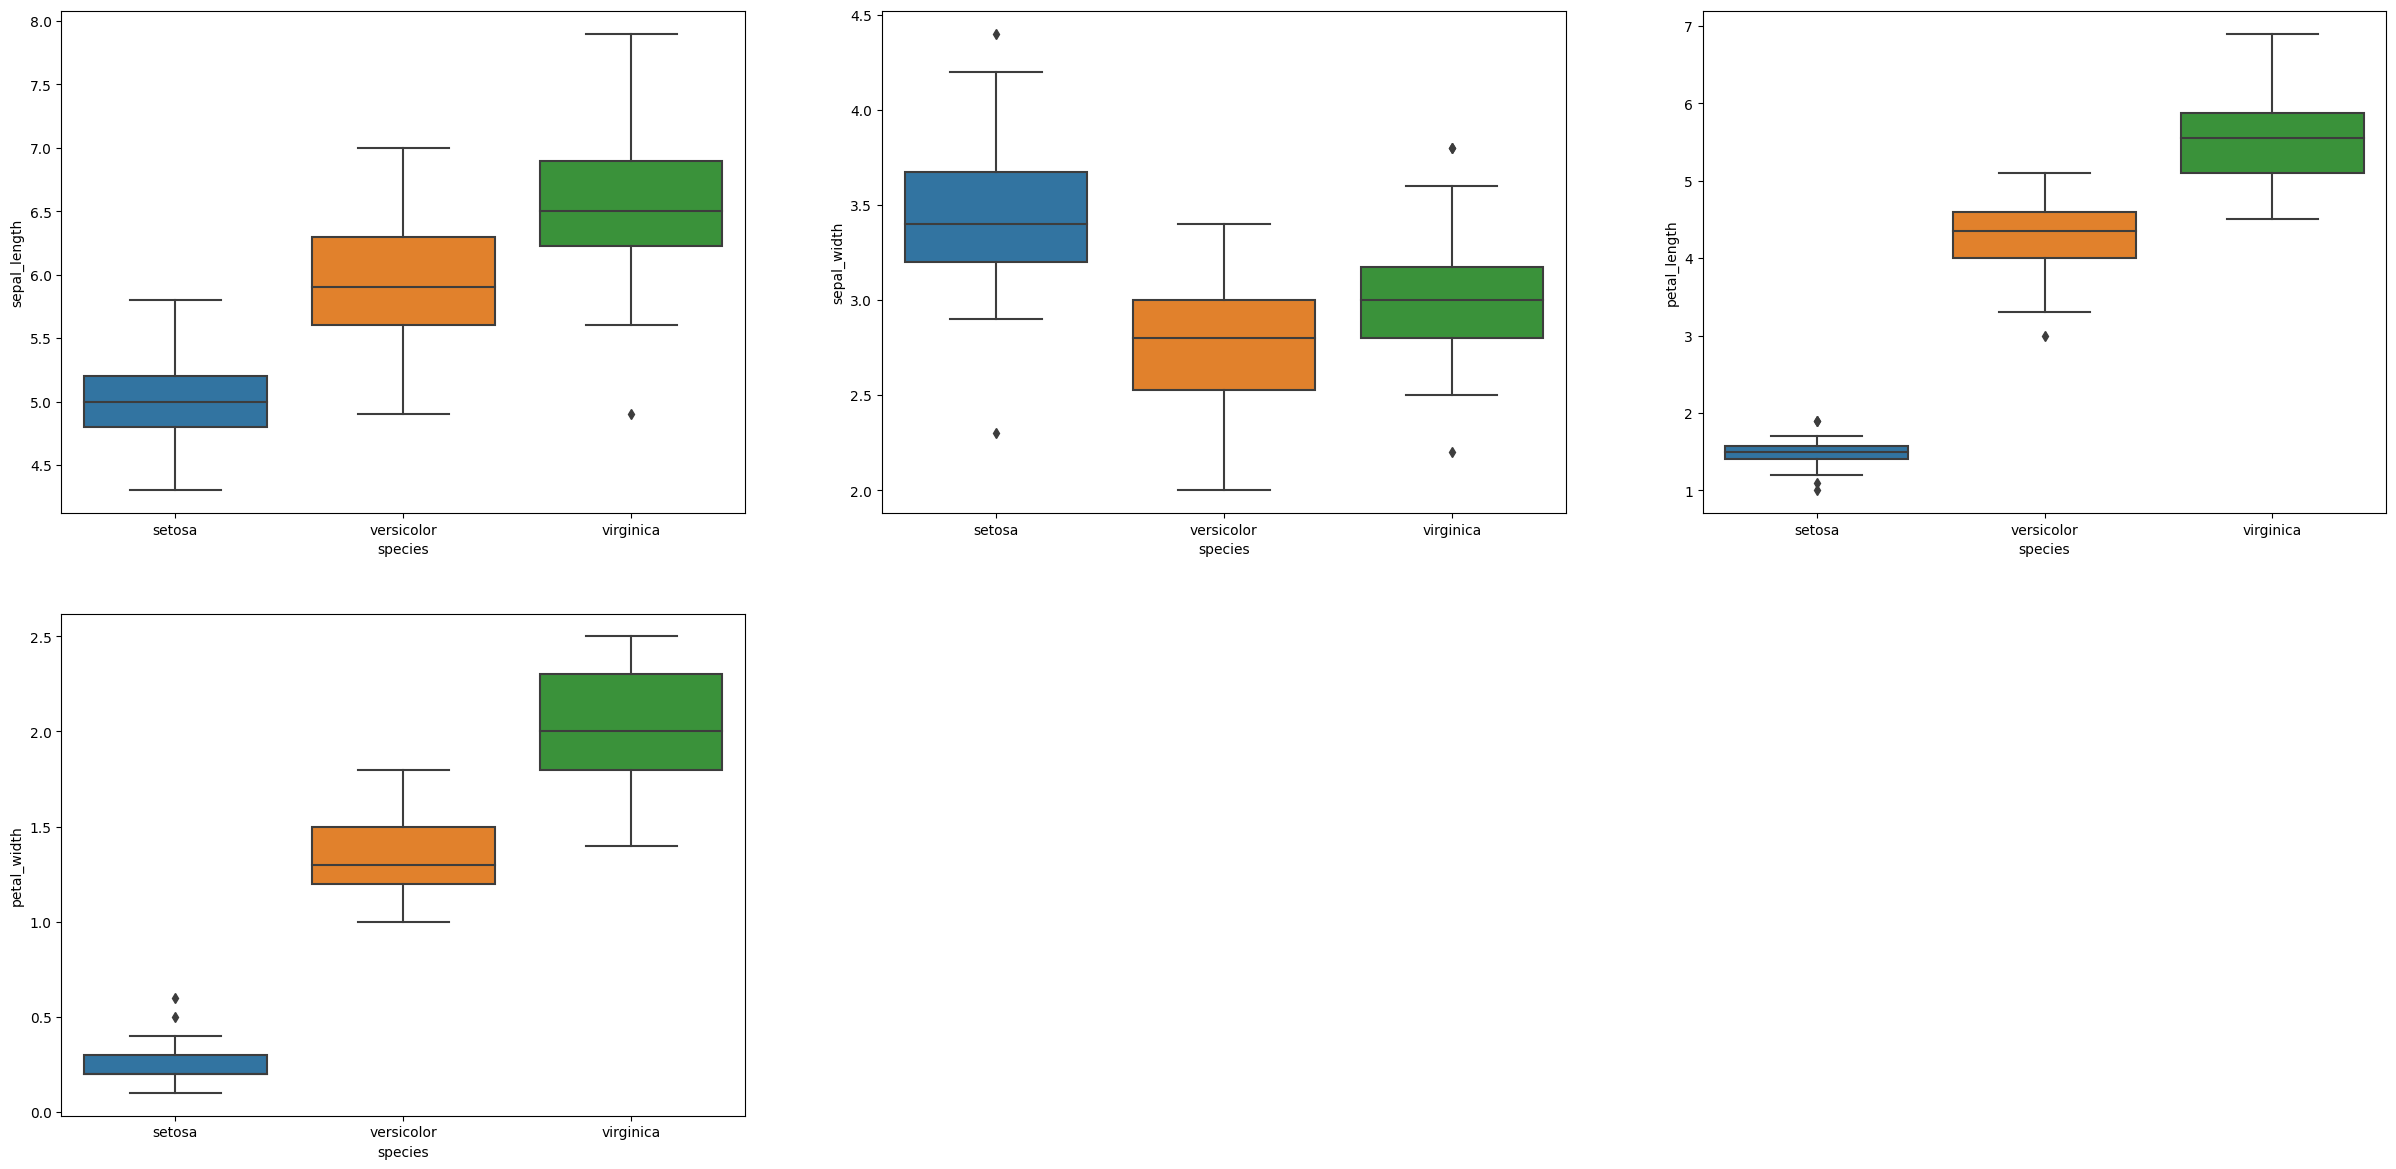

In [66]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(num_col, 1):
    plt.subplot(4,3,i)
    sb.boxplot(x="species",y=column,data=df)

# Data Preprocessing

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['species']= label_encoder.fit_transform(df['species']) 

In [68]:
X=df_num
y=df["species"]

###Train_Test_Split 

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.3)

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion_Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:,")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion_Matrix:
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
Classification Report:,
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
ypred1=dt_clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred1)
print("Confusion_Matrix:")
print(result)
result1 = classification_report(y_test, ypred1)
print("Classification Report:,")
print (result1)
result2 = accuracy_score(y_test,ypred1)
print("Accuracy:",result2)

Confusion_Matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
Classification Report:,
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


# Support Vector Machine

In [74]:
from sklearn.svm import SVC
sv_clf=SVC(kernel="linear")

In [75]:
sv_clf.fit(X_train,y_train)
ypred2=sv_clf.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred2)
print("Confusion_Matrix:")
print(result)
result1 = classification_report(y_test, ypred2)
print("Classification Report:,")
print (result1)
result2 = accuracy_score(y_test,ypred2)
print("Accuracy:",result2)

Confusion_Matrix:
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
Classification Report:,
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


# minimum distance classifier

In [77]:
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cdist

class MDC():
    def __init__(self):
        self.class_list = {}
        self.centroids = {}
    
    def fit(self, X, y):
        self.class_list = np.unique(y, axis=0)
        
        self.centroids = np.zeros((len(self.class_list), X.shape[1])) 
        for i in range(len(self.class_list)):
            temp = np.where(y==self.class_list[i])[0]
            self.centroids[i,:] = np.mean(X[temp],axis=0)
            
            
    def predict(self, X):
        temp = np.argmin(cdist(X, self.centroids),axis=1)
        y_pred = np.array([self.class_list[i] for i in temp])

        return y_pred

In [78]:
def mdc_acc():
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        acc_train=[]
        acc_test=[]
        scaler = preprocessing.MinMaxScaler()
        X_tr_scaled = scaler.fit_transform(X_train) 
        X_ts_scaled = scaler.transform(X_test)
        mdc = MDC()
        mdc.fit(X_tr_scaled, y_train)
        y_pred_tr = mdc.predict(X_tr_scaled)
        y_pred_ts = mdc.predict(X_ts_scaled)
        
        acc_train.append(accuracy_score(y_train, y_pred_tr))
        acc_test.append(accuracy_score(y_test, y_pred_ts))
        result=classification_report(y_test, y_pred_ts)
        
        #return acc_test
    print(result)

In [79]:
mdc_acc()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.50      0.83      0.62         6
           2       0.91      0.67      0.77        15

    accuracy                           0.80        30
   macro avg       0.80      0.83      0.80        30
weighted avg       0.85      0.80      0.81        30



# K-FOLD

In [80]:
data = pd.DataFrame(X,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [81]:
from sklearn.model_selection import KFold   
from sklearn.metrics import accuracy_score
K=[10,20,30]

In [82]:
for k in K:
  print("for the value k=",end="")
  print(k)
  k_fold = KFold(n_splits = k, random_state = None)  
  acc_KNN=[]
  acc_DT=[]
  acc_SVM=[]
  for training_index, testing_index in k_fold.split(data):  
    X_train, X_test = data.iloc[training_index,:], data.iloc[testing_index,:]  
    y_train, y_test = y.iloc[training_index] , y.iloc[testing_index] 
    knn_clf=KNeighborsClassifier()
    knn_clf.fit(X_train,y_train)
    ypred=knn_clf.predict(X_test)
    dt_clf=DecisionTreeClassifier()
    dt_clf.fit(X_train,y_train)
    ypred1=dt_clf.predict(X_test)
    sv_clf.fit(X_train,y_train)
    ypred2=sv_clf.predict(X_test)
    a = accuracy_score(ypred , y_test)  
    b = accuracy_score(ypred1 , y_test)
    c = accuracy_score(ypred2 , y_test)
    acc_KNN.append(a)
    acc_DT.append(b)
    acc_SVM.append(c)
  print("KNN case accuracy")
  print(sum(acc_KNN)/len(acc_KNN))
  print("Decision Tree case accuracy")
  print(sum(acc_DT)/len(acc_DT))
  print("Support Vector Machine case accuracy")
  print(sum(acc_SVM)/len(acc_SVM))
  print("#"*100)

for the value k=10
KNN case accuracy
0.9333333333333333
Decision Tree case accuracy
0.9400000000000001
Support Vector Machine case accuracy
0.9600000000000002
####################################################################################################
for the value k=20
KNN case accuracy
0.9598214285714286
Decision Tree case accuracy
0.9526785714285715
Support Vector Machine case accuracy
0.9732142857142858
####################################################################################################
for the value k=30
KNN case accuracy
0.9600000000000001
Decision Tree case accuracy
0.9400000000000002
Support Vector Machine case accuracy
0.98
####################################################################################################


# similar thing for another data set RNA SEQUENCE

In [83]:
data=pd.read_csv("/home/sourav/Downloads/swarupda/TCGA-PANCAN-HiSeq-801x20531/data.csv")
label=pd.read_csv("/home/sourav/Downloads/swarupda/TCGA-PANCAN-HiSeq-801x20531/labels.csv")

In [84]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [85]:
label

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [86]:
cls=label["Class"]
data["class"]=cls
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [87]:
label=data.drop(["Unnamed: 0"],axis=1)

In [88]:
label.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


# Preprocessing and Train Test Split

In [89]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [90]:
label['class']= label_encoder.fit_transform(label['class']) 

<AxesSubplot:xlabel='class', ylabel='count'>

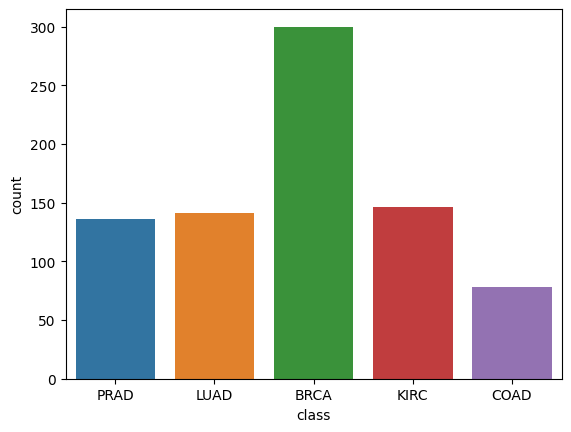

In [91]:
sb.countplot(x="class",data=data)

In [92]:
X=label.drop(["class"],axis=1)
y=label["class"]
X=pd.DataFrame(X)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

# KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion_Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:,")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion_Matrix:
[[90  0  0  0  0]
 [ 0 28  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 42]]
Classification Report:,
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        42

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Accuracy: 1.0


# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
ypred1=dt_clf.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred1)
print("Confusion_Matrix:")
print(result)
result1 = classification_report(y_test, ypred1)
print("Classification Report:,")
print (result1)
result2 = accuracy_score(y_test,ypred1)
print("Accuracy:",result2)

Confusion_Matrix:
[[87  0  1  2  0]
 [ 0 24  2  0  2]
 [ 0  0 38  3  0]
 [ 0  0  1 39  0]
 [ 0  0  0  0 42]]
Classification Report:,
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       1.00      0.86      0.92        28
           2       0.90      0.93      0.92        41
           3       0.89      0.97      0.93        40
           4       0.95      1.00      0.98        42

    accuracy                           0.95       241
   macro avg       0.95      0.95      0.95       241
weighted avg       0.96      0.95      0.95       241

Accuracy: 0.9543568464730291


# SVM

In [98]:
from sklearn.svm import SVC
sv_clf=SVC(kernel="linear")

In [99]:
sv_clf.fit(X_train,y_train)
ypred2=sv_clf.predict(X_test)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred2)
print("Confusion_Matrix:")
print(result)
result1 = classification_report(y_test, ypred2)
print("Classification Report:,")
print (result1)
result2 = accuracy_score(y_test,ypred2)
print("Accuracy:",result2)

Confusion_Matrix:
[[90  0  0  0  0]
 [ 0 28  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 42]]
Classification Report:,
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        42

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Accuracy: 1.0


# MDC

In [102]:
mdc_acc()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



# K FOLD

In [105]:
data = pd.DataFrame(X)

In [106]:
for k in K:
  print("for the value k=",end="")
  print(k)
  k_fold = KFold(n_splits = k, random_state = None)  
  acc_KNN=[]
  acc_DT=[]
  acc_SVM=[]
  for training_index, testing_index in k_fold.split(data):  
    X_train, X_test = data.iloc[training_index,:], data.iloc[testing_index,:]  
    y_train, y_test = y.iloc[training_index] , y.iloc[testing_index] 
    knn_clf=KNeighborsClassifier()
    knn_clf.fit(X_train,y_train)
    ypred=knn_clf.predict(X_test)
    dt_clf=DecisionTreeClassifier()
    dt_clf.fit(X_train,y_train)
    ypred1=dt_clf.predict(X_test)
    sv_clf.fit(X_train,y_train)
    ypred2=sv_clf.predict(X_test)
    a = accuracy_score(ypred , y_test)  
    b = accuracy_score(ypred1 , y_test)
    c = accuracy_score(ypred2 , y_test)
    acc_KNN.append(a)
    acc_DT.append(b)
    acc_SVM.append(c)
  print("KNN case accuracy")
  print(sum(acc_KNN)/len(acc_KNN))
  print("Decision Tree case accuracy")
  print(sum(acc_DT)/len(acc_DT))
  print("Support Vector Machine case accuracy")
  print(sum(acc_SVM)/len(acc_SVM))
  print("#"*100)

for the value k=10
KNN case accuracy
0.99875
Decision Tree case accuracy
0.9712962962962962
Support Vector Machine case accuracy
0.99875
####################################################################################################
for the value k=20
KNN case accuracy
0.99875
Decision Tree case accuracy
0.9825304878048782
Support Vector Machine case accuracy
0.99875
####################################################################################################
for the value k=30
KNN case accuracy
0.9987654320987654
Decision Tree case accuracy
0.983855650522317
Support Vector Machine case accuracy
0.9987654320987654
####################################################################################################
